This file attempts to use a circle mask to evaluate infill.

The following section initializes the following libraries:
- NumPy
    Array support and optimized math
- OpenCV
    Circle drawing and general image processing
- Matplotlib
    Figures and visualization

The image is loaded with `np.load`. This file uses the raw data, not the normalized data. You can modify it however you'd like, or you can download the full data.

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = np.load("../matrices/2024_FULL-STACK.npy")

In [41]:
test_img = img[:,:,80]  # THIS SELECTS ONLY ONE LAYER OF THE 3D MATRIX

# This thresholds the data so that anything less than 10900 is set to zero.
test_img = (test_img > 10900) * test_img

# This creates an empty image for the mask (all zeros)
mask_img = np.zeros(test_img.shape, dtype=np.uint8)
# This draws the mask with center at (540,540) and a radius of 493 pixels.
# The -1 at the end fills the circle.
mask_img = cv.circle(mask_img, [540, 540], 493, [1,0,0], -1)

# This adds up the mask to know the area
area = np.sum(mask_img)

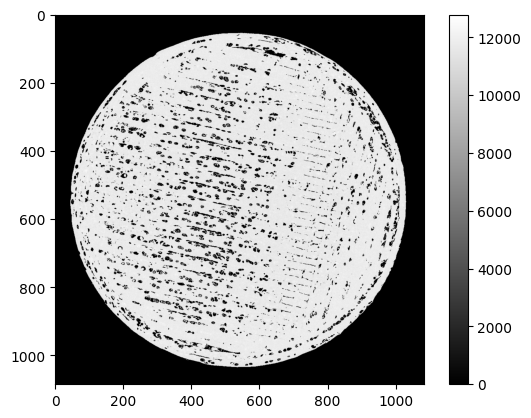

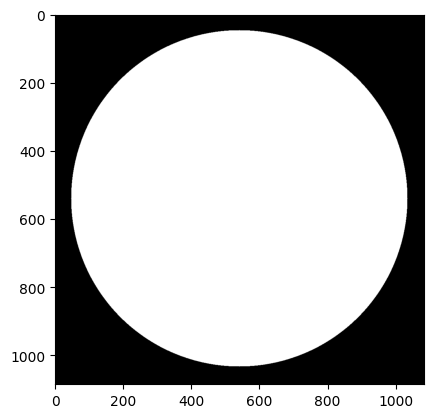

In [48]:
plt.imshow(test_img, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(mask_img, cmap='gray')
plt.show()

In [43]:
# This is the sum for the mask as if it were only the expected material
full_sum = 0.0
# Random normal values are used to better fit the variation of the material values
for i in range(area):
    val = 11627.0 + (431/3) + np.random.randn()
    full_sum += val

# This is the sum of the real image
sum = 0.0
for i in range(mask_img.shape[0]):
    for j in range(mask_img.shape[1]):
        if mask_img[i,j] == 1:
            sum += test_img[i,j]

In [44]:
# This is the sums and the ratio
print(sum)
print(full_sum)
print(sum/full_sum)

8016444756.0
8987104743.553505
0.8919941387965057
